# Frequency Control in IEEE 39-bus system
 Modified based on ANDES Demonstration of `DGPRCTExt` on IEEE 14-Bus System



In [1]:
!git clone -b develop https://github.com/Wenqi-Cui/andes_wq.git

Cloning into 'andes_wq'...
remote: Enumerating objects: 24694, done.
remote: Total 24694 (delta 0), reused 0 (delta 0), pack-reused 24694
Receiving objects: 100% (24694/24694), 50.96 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (18985/18985), done.


In [2]:
cd andes_wq

/content/andes_wq


In [3]:
!pip install -r requirements.txt
!pip install -r requirements-dev.txt
!python setup.py install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [4]:
import andes
from andes.utils.paths import get_case
import numpy as np
import matplotlib.pyplot as plt
andes.config_logger(stream_level=30)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
RecoverFlag = 0

# W.O control

## init

In [10]:
!andes misc -C

No output file found in the working directory.


In [11]:
ss = andes.load(get_case('/content/ieee39_test.xlsx'),
# ss = andes.load(get_case('ieee39_test.xlsx'),
                setup=False,
                no_output=False)

INFO:andes:Working directory: "/content/andes_wq"
DEBUG:andes:Found files: ['/content/ieee39_test.xlsx']
DEBUG:andes.system:Pycode not found. Trying to load from `calls.pkl`.
INFO:andes.system:Numerical code generation (quick mode) started...


Generating code for 86 models on 1 processes.


DEBUG:andes.core.model:Generating code for Summary
DEBUG:andes.core.symprocessor:- Generating symbols for Summary
DEBUG:andes.core.symprocessor:- Generating equations for Summary
DEBUG:andes.core.symprocessor:- Generating Jacobians for Summary
DEBUG:andes.core.model:Generating code for Toggler
DEBUG:andes.core.symprocessor:- Generating symbols for Toggler
DEBUG:andes.core.symprocessor:- Generating equations for Toggler
DEBUG:andes.core.symprocessor:- Generating Jacobians for Toggler
DEBUG:andes.core.model:Generating code for Fault
DEBUG:andes.core.symprocessor:- Generating symbols for Fault
DEBUG:andes.core.symprocessor:- Generating equations for Fault
DEBUG:andes.core.symprocessor:- Generating Jacobians for Fault
DEBUG:andes.core.model:Generating code for Alter
DEBUG:andes.core.symprocessor:- Generating symbols for Alter
DEBUG:andes.core.symprocessor:- Generating equations for Alter
DEBUG:andes.core.symprocessor:- Generating Jacobians for Alter
DEBUG:andes.core.model:Generating code f

In [12]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]



In [13]:
fault_time = 1
ss.setup()

INFO:andes.core.service:ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
DEBUG:andes.system:Setting internal address for Bus
DEBUG:andes.system:Setting internal address for PQ
DEBUG:andes.system:Setting internal address for PV
DEBUG:andes.system:Setting internal address for Slack
DEBUG:andes.system:Setting internal address for Shunt
DEBUG:andes.system:Setting internal address for Line
DEBUG:andes.system:Setting internal address for Area
INFO:andes.system:System internal structure set up in 0.1161 seconds.


True

In [14]:
# use constant power model for PQ
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.PFlow.run()

DEBUG:andes.system:Entering connectivity check.
INFO:andes.system:-> System connectivity check results:
INFO:andes.system:  No islanded bus detected.
INFO:andes.system:  System is interconnected.
DEBUG:andes.system:  Bus indices in interconnected system (0-based): [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]
INFO:andes.system:  Each island has a slack bus correctly defined and enabled.
INFO:andes.routines.pflow:
-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
INFO:andes.routines.pflow:Power flow initialized in 0.0185 seconds.
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 23.4503543 on v Bus 10
INFO:andes.routines.pflow:0: |F(x)| = 23.4503543
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 0.6960934735 on v Bus 11
INFO:andes.routines.pflow:1: |F(x)| = 0.696

True

In [15]:
ratiogen =0.7
num_PVD = 10
ss.PVD1.gammap.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.PVD1.gammaq.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.GENROU.gammap.v[0:num_PVD] = np.ones(num_PVD )*ratiogen
ss.GENROU.gammaq.v[0:num_PVD] = np.ones(num_PVD )*ratiogen

In [16]:
ss.PVD1.Ipcmd.lim.allow_adjust = True
ss.PVD1.Iqcmd.lim.allow_adjust = True
ss.PVD1.ialim.v[0:10] = ss.PVD1.ialim.v[0:10]*300


In [17]:
ss.TDS.config.tf = fault_time
ss.TDS.run()

INFO:andes.routines.tds:
-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-1 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
DEBUG:andes.system:Setting internal address for Toggler
DEBUG:andes.system:Bus internal address exists
DEBUG:andes.system:PQ internal address exists
DEBUG:andes.system:PV internal address exists
DEBUG:andes.system:Slack internal address exists
DEBUG:andes.system:Shunt internal address exists
DEBUG:andes.system:Line internal address exists
DEBUG:andes.system:Area internal address exists
DEBUG:andes.system:Setting internal address for ACEc
DEBUG:andes.system:Setting internal address for GENROU
DEBUG:andes.system:Setting internal address for TGOV1
DEBUG:andes.system:Setting internal address for EXST1
DEBUG:andes.system:Setting internal address for ESST3A
DEBUG:andes.system:Setting internal address for IEEEST
DEBUG:andes.system:Setting internal address for ST2CUT
DEBUG:andes.system:Setting internal address for BusFreq
DEBUG:andes.sys

  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.


 29%|############4                              | 29/100 [00:00<00:01, 49.77%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 32%|#############7                             | 32/100 [00:00<00:01, 50.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.6356 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0191 seconds.


True

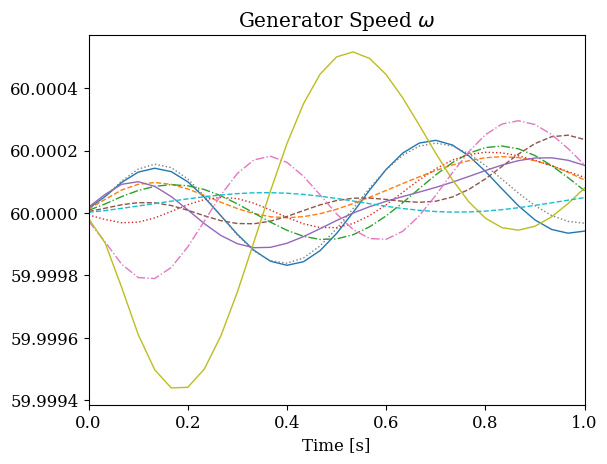

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Generator Speed $\\omega$'}, xlabel='Time [s]'>)

In [18]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')

## step load change

In [19]:
print(ss.GENROU.tm0.v)
print(ss.GENROU.p0.v)


[1.61144648 3.95486241 4.38266088 4.35681178 3.31598831 4.86732746
 4.23289961 4.20602153 6.00460929 0.09476272]
[1.61011624 3.83093281 4.3736568  4.35230594 3.31442744 4.7124446
 4.22830275 4.19276648 5.99380417 0.09435625]


In [20]:
ss.GENROU.tm0.v[7]= ss.GENROU.tm0.v[7] - 2

In [21]:


ss.TDS.config.tf = fault_time+10
ss.TDS.run()

DEBUG:andes.routines.tds:Resuming simulation from t=1.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0333s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=1.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.066767: within 0.1s of event.
DEB

 10%|####1                                    | 10.0/100 [00:00<00:05, 16.93%/s]

DEBUG:andes.system:Jacobian updated at t=1.100100: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=1.133433: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=1.298433: update every 6 iterations.


 12%|####9                                    | 12.0/100 [00:01<00:11,  7.47%/s]

DEBUG:andes.system:Jacobian updated at t=1.396767: update every 6 iterations.


 14%|#####7                                   | 14.0/100 [00:02<00:16,  5.34%/s]

DEBUG:andes.system:Jacobian updated at t=1.563433: update every 6 iterations.


 16%|######5                                  | 16.0/100 [00:02<00:19,  4.42%/s]

DEBUG:andes.system:Jacobian updated at t=1.830100: update every 6 iterations.


 18%|#######3                                 | 18.0/100 [00:03<00:22,  3.69%/s]

DEBUG:andes.system:Jacobian updated at t=2.028433: update every 6 iterations.


 22%|#########                                | 22.0/100 [00:04<00:24,  3.23%/s]

DEBUG:andes.system:Jacobian updated at t=2.460100: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=2.491767: update every 6 iterations.


 23%|#########4                               | 23.0/100 [00:05<00:28,  2.68%/s]

DEBUG:andes.system:Jacobian updated at t=2.554942: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=2.588275: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=2.621608: update every 6 iterations.


 24%|#########8                               | 24.0/100 [00:05<00:26,  2.88%/s]

DEBUG:andes.system:Jacobian updated at t=2.688275: update every 6 iterations.


 27%|###########                              | 27.0/100 [00:06<00:19,  3.79%/s]

DEBUG:andes.system:Jacobian updated at t=3.053275: update every 6 iterations.


 29%|###########8                             | 29.0/100 [00:06<00:20,  3.38%/s]

DEBUG:andes.system:Jacobian updated at t=3.284942: update every 6 iterations.


 31%|############7                            | 31.0/100 [00:07<00:16,  4.10%/s]

DEBUG:andes.system:Jacobian updated at t=3.516608: update every 6 iterations.


 32%|#############1                           | 32.0/100 [00:07<00:19,  3.44%/s]

DEBUG:andes.system:Jacobian updated at t=3.548275: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.581608: update every 6 iterations.


 33%|#############5                           | 33.0/100 [00:07<00:20,  3.19%/s]

DEBUG:andes.system:Jacobian updated at t=3.714942: update every 6 iterations.


 34%|#############9                           | 34.0/100 [00:07<00:17,  3.80%/s]

DEBUG:andes.system:Jacobian updated at t=3.746608: update every 6 iterations.


 37%|###############1                         | 37.0/100 [00:08<00:11,  5.56%/s]

DEBUG:andes.system:Jacobian updated at t=4.076450: update every 6 iterations.


 40%|################4                        | 40.0/100 [00:08<00:07,  8.19%/s]

DEBUG:andes.system:Jacobian updated at t=4.441450: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.506450: update every 6 iterations.


 41%|################8                        | 41.0/100 [00:08<00:09,  6.13%/s]

DEBUG:andes.system:Jacobian updated at t=4.538117: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.568200: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.596779: update every 6 iterations.


 42%|#################2                       | 42.0/100 [00:09<00:09,  5.83%/s]

DEBUG:andes.system:Jacobian updated at t=4.623929: update every 6 iterations.


 50%|####################5                    | 50.0/100 [00:09<00:05,  9.75%/s]

DEBUG:andes.system:Jacobian updated at t=5.586646: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.618313: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.648396: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.676976: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.704126: update every 6 iterations.


 52%|#####################3                   | 52.0/100 [00:10<00:08,  5.37%/s]

DEBUG:andes.system:Jacobian updated at t=5.758290: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.814892: update every 6 iterations.


 53%|#####################7                   | 53.0/100 [00:10<00:09,  4.88%/s]

DEBUG:andes.system:Jacobian updated at t=5.874042: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.935853: update every 6 iterations.


 56%|######################9                  | 56.0/100 [00:12<00:12,  3.46%/s]

DEBUG:andes.system:Jacobian updated at t=6.199944: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.231611: update every 6 iterations.


 58%|#######################7                 | 58.0/100 [00:12<00:13,  3.04%/s]

DEBUG:andes.system:Jacobian updated at t=6.428119: update every 6 iterations.


 59%|########################1                | 59.0/100 [00:13<00:13,  3.02%/s]

DEBUG:andes.system:Jacobian updated at t=6.526452: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.558119: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.588202: update every 6 iterations.


 60%|########################5                | 60.0/100 [00:13<00:17,  2.32%/s]

DEBUG:andes.system:Jacobian updated at t=6.616782: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.643932: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.669725: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.694228: update every 6 iterations.


 61%|#########################                | 61.0/100 [00:14<00:19,  1.99%/s]

DEBUG:andes.system:Jacobian updated at t=6.717506: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.739620: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.760628: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.780586: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.799546: update every 6 iterations.


 70%|############################7            | 70.0/100 [00:16<00:04,  6.36%/s]

DEBUG:andes.system:Jacobian updated at t=7.703762: update every 6 iterations.


 73%|#############################9           | 73.0/100 [00:16<00:03,  7.15%/s]

DEBUG:andes.system:Jacobian updated at t=8.068762: update every 6 iterations.


 74%|##############################3          | 74.0/100 [00:16<00:04,  6.23%/s]

DEBUG:andes.system:Jacobian updated at t=8.167095: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.232095: update every 6 iterations.


 75%|##############################7          | 75.0/100 [00:16<00:04,  5.63%/s]

DEBUG:andes.system:Jacobian updated at t=8.463762: update every 6 iterations.


 77%|###############################5         | 77.0/100 [00:17<00:04,  5.49%/s]

DEBUG:andes.system:Jacobian updated at t=8.562095: update every 6 iterations.


 78%|###############################9         | 78.0/100 [00:17<00:03,  6.02%/s]

DEBUG:andes.system:Jacobian updated at t=8.593762: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.623845: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.652425: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.679575: update every 6 iterations.


 79%|################################3        | 79.0/100 [00:17<00:04,  5.02%/s]

DEBUG:andes.system:Jacobian updated at t=8.705367: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.729870: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.753148: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.775262: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.796271: update every 6 iterations.


 80%|################################8        | 80.0/100 [00:18<00:05,  3.64%/s]

DEBUG:andes.system:Jacobian updated at t=8.816229: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.835189: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.853201: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.870312: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.889135: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.907016: update every 6 iterations.


 81%|#################################2       | 81.0/100 [00:18<00:06,  2.94%/s]

DEBUG:andes.system:Jacobian updated at t=8.924003: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.942689: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.960441: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.977305: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.995856: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.013479: update every 6 iterations.


 87%|###################################6     | 87.0/100 [00:20<00:04,  3.19%/s]

DEBUG:andes.system:Jacobian updated at t=9.771604: update every 6 iterations.


 89%|####################################4    | 89.0/100 [00:21<00:02,  4.72%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 91%|#####################################3   | 91.0/100 [00:21<00:01,  5.72%/s]

DEBUG:andes.system:Jacobian updated at t=10.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.033433: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.066767: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at

 92%|#####################################7   | 92.0/100 [00:21<00:01,  5.32%/s]

DEBUG:andes.system:Jacobian updated at t=10.165100: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.196767: update every 6 iterations.


 93%|######################################1  | 93.0/100 [00:21<00:01,  5.55%/s]

DEBUG:andes.system:Jacobian updated at t=10.259942: update every 6 iterations.


 94%|######################################5  | 94.0/100 [00:21<00:01,  5.87%/s]

DEBUG:andes.system:Jacobian updated at t=10.458045: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.489712: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.519795: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.548375: update every 6 iterations.


 96%|#######################################3 | 96.0/100 [00:22<00:00,  6.21%/s]

DEBUG:andes.system:Jacobian updated at t=10.575525: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.601317: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.625821: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.649098: update every 6 iterations.


 97%|#######################################7 | 97.0/100 [00:22<00:00,  5.70%/s]

DEBUG:andes.system:Jacobian updated at t=10.671212: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.692221: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.712179: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.731139: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.749151: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.766262: update every 6 iterations.


 98%|########################################1| 98.0/100 [00:22<00:00,  4.70%/s]

DEBUG:andes.system:Jacobian updated at t=10.782518: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.800399: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.817387: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.833525: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.851276: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.868141: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.886691: update every 6 iterations.


 99%|########################################5| 99.0/100 [00:23<00:00,  3.75%/s]

DEBUG:andes.system:Jacobian updated at t=10.904314: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.921056: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.939472: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.956968: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.973588: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.991871: update every 6 iterations.


100%|########################################| 100.0/100 [00:23<00:00,  3.54%/s]

DEBUG:andes.system:Jacobian updated at t=11.000000: update every 6 iterations.


100%|########################################| 100.0/100 [00:23<00:00,  4.26%/s]

INFO:andes.routines.tds:Simulation completed in 23.4666 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1689 seconds.


True

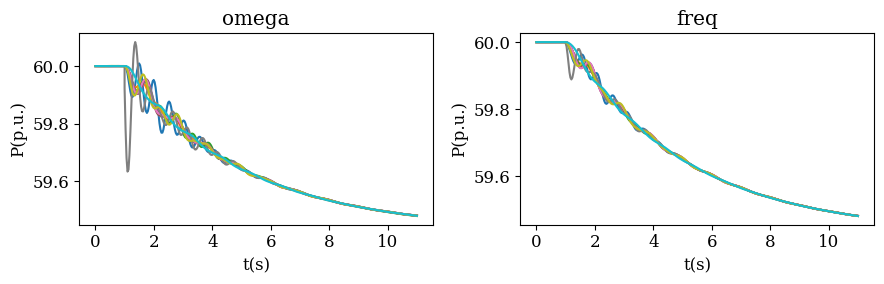

In [22]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 0
TimeStep = np.size(ListTime)
#  1100
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()

# With Linear Control

In [23]:

!pip install mat4py
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import gym
import tensorflow as tf
import os
import random
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import RNN
import tensorflow.keras.backend as K
import sys
from gym import spaces
from gym.utils import seeding
import copy
from mat4py import loadmat
from tensorflow.keras import layers
from tensorflow import keras

In [24]:
max_action=np.array([[0.19606592, 0.2190382 , 0.22375287, 0.0975513 , 0.29071101,
        0.22091283, 0.38759459, 0.56512538, 0.24151538, 0.29821917]],dtype=np.float32)*1.
linear_coff=np.array([[ 2.2347659,   2.720281 ,   2.4595585,  43.59709  ,   5.7675405,
          2.3880444, 156.02136  ,  12.0558605,   2.8042254,  25.922562  ]], dtype=np.float32)*1
max_action = max_action.reshape(-1)
linear_coff = linear_coff.reshape(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
def Action_linear(pref0_init, linear_coff, idexs, max_action):
    action_nonconstrain =  - (ss.PVD1.fHz.v[idexs]-60)*linear_coff[idexs]

    action=max_action[idexs]-tf.nn.relu(max_action[idexs]-action_nonconstrain)+tf.nn.relu(-max_action[idexs]-action_nonconstrain)
    return pref0_init[idexs]+action

## init

In [26]:
!andes misc -C

"/content/andes_wq/ieee39_test_out.npz" removed.
"/content/andes_wq/ieee39_test_out.txt" removed.
"/content/andes_wq/ieee39_test_out.lst" removed.


In [27]:
ss = andes.load(get_case('/content/ieee39_test.xlsx'),
# ss = andes.load(get_case('ieee39_test.xlsx'),
                setup=False,
                no_output=False)

INFO:andes:Working directory: "/content/andes_wq"
DEBUG:andes:Found files: ['/content/ieee39_test.xlsx']
INFO:andes.system:> Reloaded generated Python code of module "pycode".
DEBUG:andes.io:Input format guessed as xlsx.
INFO:andes.io:Parsing input file "/content/ieee39_test.xlsx"...
INFO:andes.io:Input file parsed in 2.6248 seconds.


In [28]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
ss.BusFreq.Tf.v[0:10] = 0.05*np.ones(10)
ss.BusFreq.Tw.v[0:10] = 0.03*np.ones(10)


In [30]:
fault_time = 1

ss.setup()

INFO:andes.core.service:ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
DEBUG:andes.system:Setting internal address for Bus
DEBUG:andes.system:Setting internal address for PQ
DEBUG:andes.system:Setting internal address for PV
DEBUG:andes.system:Setting internal address for Slack
DEBUG:andes.system:Setting internal address for Shunt
DEBUG:andes.system:Setting internal address for Line
DEBUG:andes.system:Setting internal address for Area
INFO:andes.system:System internal structure set up in 0.3697 seconds.


True

In [31]:
# use constant power model for PQ
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.PFlow.run()

DEBUG:andes.system:Entering connectivity check.
INFO:andes.system:-> System connectivity check results:
INFO:andes.system:  No islanded bus detected.
INFO:andes.system:  System is interconnected.
DEBUG:andes.system:  Bus indices in interconnected system (0-based): [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]
INFO:andes.system:  Each island has a slack bus correctly defined and enabled.
INFO:andes.routines.pflow:
-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
INFO:andes.routines.pflow:Power flow initialized in 0.0193 seconds.
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 23.4503543 on v Bus 10
INFO:andes.routines.pflow:0: |F(x)| = 23.4503543
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 0.6960934735 on v Bus 11
INFO:andes.routines.pflow:1: |F(x)| = 0.696

True

In [32]:
ratiogen =0.7
num_PVD = 10
ss.PVD1.gammap.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.PVD1.gammaq.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.GENROU.gammap.v[0:num_PVD] = np.ones(num_PVD )*ratiogen
ss.GENROU.gammaq.v[0:num_PVD] = np.ones(num_PVD )*ratiogen

In [33]:
ss.PVD1.Ipcmd.lim.allow_adjust = True
ss.PVD1.Iqcmd.lim.allow_adjust = True
ss.PVD1.ialim.v[0:10] = ss.PVD1.ialim.v[0:10]*300


In [34]:
ss.TDS.config.tf = fault_time
ss.TDS.run()

INFO:andes.routines.tds:
-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-1 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
DEBUG:andes.system:Setting internal address for Toggler
DEBUG:andes.system:Bus internal address exists
DEBUG:andes.system:PQ internal address exists
DEBUG:andes.system:PV internal address exists
DEBUG:andes.system:Slack internal address exists
DEBUG:andes.system:Shunt internal address exists
DEBUG:andes.system:Line internal address exists
DEBUG:andes.system:Area internal address exists
DEBUG:andes.system:Setting internal address for ACEc
DEBUG:andes.system:Setting internal address for GENROU
DEBUG:andes.system:Setting internal address for TGOV1
DEBUG:andes.system:Setting internal address for EXST1
DEBUG:andes.system:Setting internal address for ESST3A
DEBUG:andes.system:Setting internal address for IEEEST
DEBUG:andes.system:Setting internal address for ST2CUT
DEBUG:andes.system:Setting internal address for BusFreq
DEBUG:andes.sys

  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.


 30%|############9                              | 30/100 [00:01<00:03, 19.48%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 32%|#############7                             | 32/100 [00:01<00:03, 20.95%/s]

INFO:andes.routines.tds:Simulation completed in 1.5303 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1036 seconds.


True

<>:3: DeprecationWarning: invalid escape sequence '\o'
/content/andes_wq/andes/shared.py:89: DeprecationWarning: Use shutil.which instead of find_executable
  if find_executable('dvipng'):
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2860: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vmin, vmax = map(float, [vmin, vmax])


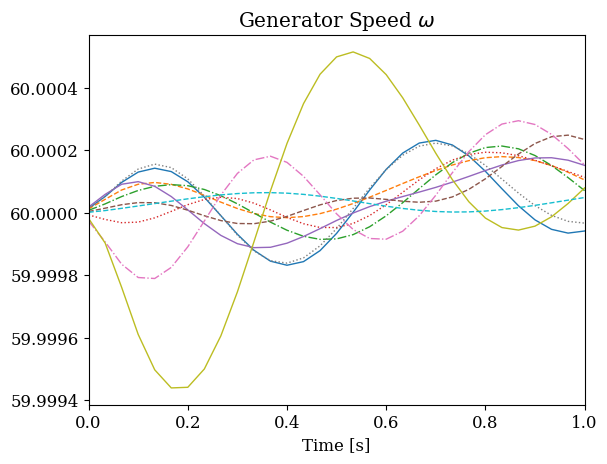

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Generator Speed $\\omega$'}, xlabel='Time [s]'>)

In [35]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')

## Apply the control

In [36]:

PQStepIdx = 16
PQInit = np.array(ss.PQ.Ppf.v[PQStepIdx]).copy()
PQ_after = 6

ss.PQ.Ppf.v[PQStepIdx] = PQ_after



In [37]:
pref0_init = ss.PVD1.pref0.v.copy()

In [38]:
step_t = 0.02
tstart =fault_time
TimeLength = tstart+10
idexs = np.arange(0,10)
for t in np.arange(tstart, TimeLength, step_t):
    ss.PVD1.pref0.v[idexs] = Action_linear(pref0_init, linear_coff, idexs, max_action)
    print(ss.PVD1.pref0.v[idexs] )
    ss.TDS.config.tf = t
    ss.TDS.run(tstep = 0.01)
    # ss.TDS.run(tstep = 0.01, max_iter = 50)

DEBUG:andes.routines.tds:Resuming simulation from t=1.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0000s.


[0.69002279 1.64156482 1.87416455 1.86001772 1.41971277 2.01924032
 1.78570825 1.7966394  2.56878915 0.03941641]
100%|####################################| 100.0/100 [00:00<00:00, 342392.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0069 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0513 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.69002279 1.64156482 1.87416455 1.86001772 1.41971277 2.01924032
 1.78570825 1.7966394  2.56878915 0.03941641]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 99%|#######################################6| 99.0/100 [00:00<00:00, 130.33%/s]

DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 101.36%/s]

INFO:andes.routines.tds:Simulation completed in 0.9944 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0525 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.71832057 1.66252303 1.8940662  1.96282528 1.46929586 2.04219784
 2.19972433 2.04902666 2.8102886  0.10331197]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 716.90%/s]

DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 250.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.4090 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0761 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.7292464  1.67031421 1.90092067 1.96282528 1.48453074 2.04755489
 2.19972433 2.1017275  2.8102886  0.12873819]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 670.44%/s]

DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 270.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.3729 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0246 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.74029158 1.67850817 1.90759818 1.96282528 1.49785524 2.05185462
 2.19972433 2.12012952 2.8102886  0.15544797]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 602.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.1682 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0490 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.75987945 1.6945675  1.92187453 1.96282528 1.53322312 2.06610516
 2.19972433 2.21920715 2.8102886  0.21371331]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 658.33%/s]

DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 341.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.3022 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0226 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.78039697 1.71265061 1.93869105 1.96282528 1.57300607 2.08239818
 2.19972433 2.31282529 2.8102886  0.28843586]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 440.53%/s]

DEBUG:andes.system:Jacobian updated at t=1.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 282.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.3617 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0409 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.



[0.79691936 1.72963851 1.95518762 1.96282528 1.61020401 2.09828496
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 756.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.1343 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0347 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1400s.



[0.80788914 1.74487196 1.97059436 1.96282528 1.6456186  2.11404445
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 751.96%/s]

INFO:andes.routines.tds:Simulation completed in 0.1428 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0694 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.81264701 1.75770645 1.98402663 1.96282528 1.67807495 2.12940369
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 499.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.2094 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0555 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.81102348 1.76725213 1.99429924 1.96282528 1.70469096 2.14324964
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.180000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 388.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.2636 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0206 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.80391502 1.77299244 2.00055785 1.96282528 1.71117992 2.15417631
 2.19972433 2.36202533 2.75400073 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 515.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.2009 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0388 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.79351313 1.7751788  2.00272987 1.96282528 1.71117992 2.16105495
 2.19972433 2.34192736 2.67249203 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1959.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0571 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0228 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.78244998 1.77440443 2.00120312 1.96282528 1.71117992 2.16297286
 2.19972433 2.2981809  2.60468092 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 703.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.1473 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0420 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.77305463 1.77134262 1.99660648 1.96282528 1.71117992 2.15930331
 2.19972433 2.26332658 2.55685488 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1282.23%/s]


INFO:andes.routines.tds:Simulation completed in 0.0854 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0264 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.76700196 1.76684086 1.98990633 1.96282528 1.71117992 2.15016264
 2.19972433 2.23808561 2.53254493 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1502.90%/s]

INFO:andes.routines.tds:Simulation completed in 0.0734 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0226 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.76532779 1.76196169 1.98241472 1.96282528 1.6868767  2.13661313
 2.19972433 2.22285768 2.53330603 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1276.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0848 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0503 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.7683944  1.75791245 1.97566778 1.96282528 1.66101978 2.12067613
 2.19972433 2.22336464 2.55702038 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 836.77%/s]

DEBUG:andes.system:Jacobian updated at t=1.340000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 283.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.3742 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0786 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.77565183 1.7557211  1.97103763 1.96282528 1.6383942  2.10485467
 2.19972433 2.24190241 2.59804538 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 916.36%/s]

INFO:andes.routines.tds:Simulation completed in 0.1139 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0259 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.78585511 1.75613749 1.96956405 1.96282528 1.62025646 2.09176138
 2.19972433 2.27635792 2.64874315 0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1231.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0881 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0241 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.



[0.79751114 1.75968056 1.97195094 1.96282528 1.60994256 2.08389174
 2.19972433 2.32297973 2.70127063 0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 983.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1072 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0523 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.80916693 1.76651279 1.97841567 1.96282528 1.610525   2.08312405
 2.19972433 2.36202533 2.74863652 0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1048.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.1010 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0407 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.4200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.81975615 1.77642838 1.98867366 1.96282528 1.62343899 2.09038204
 2.19972433 2.36202533 2.78552405 0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 811.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1289 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0838 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.82889779 1.78895159 2.00205573 1.96282528 1.64865963 2.10552867
 2.19972433 2.36202533 2.80896511 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1188.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0901 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0763 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.83647098 1.80321284 2.01744211 1.96282528 1.68455982 2.12723259
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1570.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0754 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0301 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.84269533 1.81814327 2.03350101 1.96282528 1.71117992 2.15321627
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 859.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.1188 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0521 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.84820601 1.8327401  2.04899518 1.96282528 1.71117992 2.18073075
 2.19972433 2.36202533 2.8015736  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 828.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1279 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0413 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.85364604 1.84612503 2.06288139 1.96282528 1.71117992 2.20697554
 2.19972433 2.36202533 2.78279268 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1447.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0718 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1145 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.85941155 1.85754795 2.07432648 1.96282528 1.71117992 2.22935256
 2.19972433 2.36202533 2.76416144 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1481.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0740 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0800 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5600s.



[0.86550411 1.86086655 2.08278896 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.75013469 0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1086.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.0992 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0380 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.87163335 1.86086655 2.08821917 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.74349751 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1233.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.0903 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0812 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6000s.


[0.87728295 1.86086655 2.09086094 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.7456491  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 922.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.1136 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0308 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.



[0.88181992 1.86086655 2.09108726 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.75625859 0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1423.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0773 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1342 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88472675 1.86086655 2.08948033 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.7734398  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 652.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1578 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88575558 1.86086655 2.08672971 1.96282528 1.71117992 2.23906882
 2.19972433 2.36202533 2.79425835 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 589.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.1748 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0648 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88497398 1.86086655 2.08346395 1.96282528 1.71117992 2.22770797
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1053.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0971 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0394 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88278524 1.86086655 2.08022259 1.96282528 1.71117992 2.21731354
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1174.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0901 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0344 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87982521 1.86086655 2.07738968 1.96282528 1.71117992 2.20902042
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1076.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.0954 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0531 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87674827 1.86086655 2.07515093 1.96282528 1.71117992 2.20313709
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1055.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.0964 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0836 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87411819 1.86086655 2.0735734  1.96282528 1.71117992 2.19983608
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.780000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 988.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1056 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0525 seconds.


[0.87233968 1.86086655 2.07266525 1.96282528 1.71117992 2.19900252
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=1.7800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1103.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0934 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0367 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.87155595 1.8604265  2.07238102 1.96282528 1.71117992 2.20022092
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2311.47%/s]


INFO:andes.routines.tds:Simulation completed in 0.0458 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0473 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.8716529  1.86081545 2.07265446 1.96282528 1.71117992 2.20291052
 2.19972433 2.36202533 2.80856101 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2066.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0514 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0469 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.


[0.87234309 1.86086655 2.0734113  1.96282528 1.71117992 2.20646571
 2.19972433 2.36202533 2.7887918  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1810.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0701 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0540 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87334254 1.86086655 2.0746392  1.96282528 1.71117992 2.21040233
 2.19972433 2.36202533 2.77229771 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 809.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.1264 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0379 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8800s.



[0.87439867 1.86086655 2.07631915 1.96282528 1.71117992 2.21434002
 2.19972433 2.36202533 2.76138736 0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 892.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.1159 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0707 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87535835 1.86086655 2.07838494 1.96282528 1.71117992 2.21800257
 2.19972433 2.36202533 2.75654219 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 431.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.2346 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0389 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.8762952  1.86086655 2.08079334 1.96282528 1.71117992 2.22128335
 2.19972433 2.36202533 2.7583145  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1063.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.0962 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0564 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87743362 1.86086655 2.0834847  1.96282528 1.71117992 2.22418254
 2.19972433 2.36202533 2.76649666 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1035.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.1008 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1274 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.87904583 1.86086655 2.0863622  1.96282528 1.71117992 2.22675524
 2.19972433 2.36202533 2.77985957 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1138.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0901 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0773 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.


[0.88135113 1.86086655 2.0892999  1.96282528 1.71117992 2.22908193
 2.19972433 2.36202533 2.7964511  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 594.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1761 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0868 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88442456 1.86086655 2.09215779 1.96282528 1.71117992 2.23124524
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 667.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.1465 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0734 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09480576 1.96282528 1.71117992 2.23332024
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 987.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.1073 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1085 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09716229 1.96282528 1.71117992 2.23538562
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1331.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0804 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0504 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.23745802
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 579.55%/s]

DEBUG:andes.system:Jacobian updated at t=2.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 376.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.2702 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0641 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.23948704
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1867.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0578 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0564 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 500.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.2147 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1349 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 712.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.1450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0914 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1060.56%/s]

INFO:andes.routines.tds:Simulation completed in 0.1029 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1089 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.180000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 710.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1465 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0629 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1159.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0955 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0671 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2000s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 926.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.1109 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0755 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.80953973 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1377.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.0757 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0424 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.80401861 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1212.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0870 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0565 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24009929
 2.19972433 2.36202533 2.80180215 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 867.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.1186 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1063 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09785728 1.96282528 1.71117992 2.23717436
 2.19972433 2.36202533 2.80266377 0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 929.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.1143 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0741 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09636834 1.96282528 1.71117992 2.23421114
 2.19972433 2.36202533 2.80577528 0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1615.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.0643 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0491 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09506703 1.96282528 1.71117992 2.23152011
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1036.16%/s]


INFO:andes.routines.tds:Simulation completed in 0.1000 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0608 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09409115 1.96282528 1.71117992 2.22933064
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.360000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1095.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0947 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0708 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09355285 1.96282528 1.71117992 2.22791147
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1323.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0816 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1138 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09357784 1.96282528 1.71117992 2.22745982
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1246.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0836 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0747 seconds.



[0.88611574 1.86086655 2.09422629 1.96282528 1.71117992 2.22804982
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=2.4000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 785.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.1368 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1497 seconds.


[0.88611574 1.86086655 2.0954854  1.96282528 1.71117992 2.22964881
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=2.4200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 335.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.3055 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1468 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09726664 1.96282528 1.71117992 2.23212165
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 548.52%/s]


INFO:andes.routines.tds:Simulation completed in 0.1922 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1508 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4600s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.23524719
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 616.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1687 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1158 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.23874982
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 556.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1819 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0858 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 796.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.1284 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1332 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 854.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.1264 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1505 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.540000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 346.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.2929 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1595 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 900.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1144 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1092 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1013.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.1033 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0922 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 844.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1282 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0894 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 512.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.2041 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1493 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1022.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.1045 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1068 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1110.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0959 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1458 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 325.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.3096 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2514 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 624.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.1648 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0874 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 687.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.1485 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2093 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 843.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1271 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1046 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1062.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.1049 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1167 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1469.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0701 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1119 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24028954
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 546.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1863 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0984 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24038037
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1461.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0732 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0638 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1616.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0643 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0605 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1476.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0728 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0943 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=2.8800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 802.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1449 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1472 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9000s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1474.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0715 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0913 seconds.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=2.9200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|#######################################| 100.0/100 [00:00<00:00, 656.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1549 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1395 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1147.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.0998 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2261 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1083.90%/s]

INFO:andes.routines.tds:Simulation completed in 0.0952 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0816 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1909.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0550 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0910 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 749.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1429 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1032 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 734.05%/s]

DEBUG:andes.system:Jacobian updated at t=3.040000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 497.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.2109 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0694 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.060000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 682.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.1531 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0915 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.060000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 945.37%/s]

DEBUG:andes.system:Jacobian updated at t=3.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 583.56%/s]

INFO:andes.routines.tds:Simulation completed in 0.1741 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1102 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 991.40%/s]

DEBUG:andes.system:Jacobian updated at t=3.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 616.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.1648 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0755 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 663.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.1537 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0758 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 674.66%/s]

DEBUG:andes.system:Jacobian updated at t=3.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 337.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.3113 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2081 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|#######################################| 100.0/100 [00:00<00:00, 940.02%/s]

INFO:andes.routines.tds:Simulation completed in 0.1090 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0874 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1008.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.1078 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0779 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1174.91%/s]


INFO:andes.routines.tds:Simulation completed in 0.0875 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0774 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2000s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 812.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.1260 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0793 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1783.06%/s]

INFO:andes.routines.tds:Simulation completed in 0.0592 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0738 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1880.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0545 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0593 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2085.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.0493 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0609 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2146.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0478 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0555 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1995.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0529 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0547 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1379.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0750 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0661 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1532.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0687 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0679 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1310.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0794 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0773 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1300.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0806 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0595 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2855.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0362 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0573 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2565.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0421 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0620 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=3.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2930.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.0354 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0575 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=3.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 893.03%/s]


INFO:andes.routines.tds:Simulation completed in 0.1157 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0712 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.500000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1025.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1000 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0575 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.520000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1254.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0827 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0580 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.540000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1334.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0782 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0580 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.560000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 931.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1102 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0670 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5600s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.580000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 912.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.1132 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0718 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.580000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 853.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.1208 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0687 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1390.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.0746 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0597 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1312.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.0788 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0827 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1602.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0648 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0780 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1321.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0802 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0793 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1335.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.0773 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1055 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=3.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1270.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0812 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0904 seconds.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=3.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1845.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0565 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0734 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1437.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0737 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0840 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1614.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0609 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0795 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2026.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0528 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0957 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1191.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0865 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0873 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1173.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0866 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0858 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.860000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 855.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1194 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1000 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1160.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0884 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.900000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 780.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.1328 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1101 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 834.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1230 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1095 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 965.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1053 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 939.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.1078 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1008 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.980000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 899.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1152 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1179 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.000000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1096.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0934 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0773 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 996.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.1030 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0887 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.040000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1219.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0843 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0796 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.060000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1145.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.0896 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0872 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0600s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 798.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1291 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1103 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 898.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.1127 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0835 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1411.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.0724 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1019 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=4.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 850.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.1189 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0877 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 879.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.1157 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1232 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1181.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0870 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0937 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1800s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1387.81%/s]


INFO:andes.routines.tds:Simulation completed in 0.0758 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1030 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1376.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0767 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0949 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1614.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0653 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0993 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1393.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0776 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1171 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1158.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0902 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1004 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1777.56%/s]

INFO:andes.routines.tds:Simulation completed in 0.0587 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0911 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1984.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0529 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0968 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1600.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0670 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0992 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3400s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1618.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0645 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0889 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1120.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.0914 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0890 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3800s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1022.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.1000 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0860 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=4.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1170.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0879 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0876 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.440000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1007.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1037 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1071 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1799.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.0583 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0974 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2177.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.0477 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1106 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1882.99%/s]


INFO:andes.routines.tds:Simulation completed in 0.0573 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1030 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2354.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.0487 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1051 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.540000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1089.90%/s]

INFO:andes.routines.tds:Simulation completed in 0.0950 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1171 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.560000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 747.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.1366 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1040 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1107.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0927 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0986 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.600000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1055.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0974 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0992 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 978.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.1050 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1073 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.620000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1068.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.0961 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1233 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1314.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0792 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0859 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=4.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1508.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0690 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0835 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1634.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0651 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0800 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1294.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0815 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0839 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1532.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0684 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1006 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=4.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1304.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0792 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1892.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0541 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0859 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2077.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.0506 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0840 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1683.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.0609 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0830 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1723.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0605 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0910 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1327.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0779 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0936 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8600s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 944.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1092 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1016 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1163.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0882 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0873 seconds.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=4.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.920000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1041.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0994 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0844 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=4.9200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2359.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0452 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0955 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2368.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1111 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1986.11%/s]


INFO:andes.routines.tds:Simulation completed in 0.0529 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1062 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2188.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0482 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0917 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2463.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0430 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0902 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2598.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.0407 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0927 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2056.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.0513 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0964 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1797.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0581 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1153 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2525.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.0419 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1201 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2325.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.0459 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0938 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2251.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0464 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0951 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1738.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0597 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0966 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1422.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0717 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1044 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1800s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1315.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0805 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0954 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1688.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.0610 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1086 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1533.64%/s]


INFO:andes.routines.tds:Simulation completed in 0.0690 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1012 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1676.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0624 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0950 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1527.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0732 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1080 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=5.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1528.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0683 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0981 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1780.91%/s]

INFO:andes.routines.tds:Simulation completed in 0.0584 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1091 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1716.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0606 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0959 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1699.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0602 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0969 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1719.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0632 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1045 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2032.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0537 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1289 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=5.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1958.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0533 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0953 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2438.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.0437 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1130 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2668.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0399 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1125 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2277.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.0478 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0975 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1937.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.0543 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1196 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2262.15%/s]


INFO:andes.routines.tds:Simulation completed in 0.0467 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1162 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2749.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0387 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1179 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2158.59%/s]


INFO:andes.routines.tds:Simulation completed in 0.0511 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1019 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2513.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0422 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1127 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3292.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0334 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1289 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2163.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0490 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1155 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2608.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0410 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1381 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1316.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.0783 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1523 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 829.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.1221 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1384 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 845.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1237 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1443 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1568.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0660 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1212 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1517.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0683 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1363 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1369.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0757 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1295 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1071.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0949 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1249 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1227.11%/s]

INFO:andes.routines.tds:Simulation completed in 0.0829 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1272 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1359.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0788 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1418 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1205.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0843 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1324 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1065.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.0970 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1384 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 938.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.1089 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1235 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.900000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 870.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1178 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1423 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 913.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1162 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1654 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 721.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1410 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1255 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 971.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.1055 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1294 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.980000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 888.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.1145 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1291 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1437.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0752 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1296 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2039.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0537 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1370 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2431.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0435 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1209 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.060000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1338.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0768 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1298 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 988.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1034 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1286 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 884.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.1157 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1635 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 889.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1138 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1613 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 868.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.1164 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1273 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 698.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1478 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1835 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=6.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.180000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 875.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1198 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1432 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.200000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 871.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1162 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1642 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.220000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 881.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.1160 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1855 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=6.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.240000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 908.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.1170 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1517 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.240000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1207.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0852 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1478 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1318.84%/s]

INFO:andes.routines.tds:Simulation completed in 0.0782 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1633 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1125.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.0915 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1506 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1604.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0647 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1349 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1636.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0635 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1274 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.360000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1014.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1014 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1433 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.380000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 838.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.1209 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1408 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 900.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.1134 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1326 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1140.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0893 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1388 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 894.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.1140 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1559 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 902.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1130 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1391 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 943.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1082 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1377 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.500000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1090.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0930 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1356 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.520000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1058.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0976 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1555 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.540000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1076.70%/s]

INFO:andes.routines.tds:Simulation completed in 0.0951 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1341 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.560000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 891.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1148 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1202 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1098.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0937 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1670 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.600000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 852.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.1188 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1475 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 874.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1157 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1869 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.640000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 952.06%/s]

INFO:andes.routines.tds:Simulation completed in 0.1063 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1525 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.660000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 813.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.1245 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1588 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 862.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1182 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1535 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.700000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 981.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1050 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1431 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.720000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1202.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0865 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1586 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.740000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 771.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.1325 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1708 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=6.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.760000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 772.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.1306 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1592 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.780000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 906.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.1146 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2101 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1076.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0954 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1522 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.820000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1162.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0882 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1495 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1120.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0914 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1532 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.860000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 740.42%/s]

INFO:andes.routines.tds:Simulation completed in 0.1371 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1687 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 918.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1115 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1486 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1084.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.0945 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1494 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 914.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.1106 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1602 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 990.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1024 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1471 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 901.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.1154 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1838 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.980000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 927.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.1103 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2323 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.000000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 821.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.1242 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1900 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 764.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.1323 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1782 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.040000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 809.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.1250 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1588 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.060000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 853.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.1194 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1759 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 834.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1218 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1805 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 766.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1318 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1537 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 934.84%/s]

INFO:andes.routines.tds:Simulation completed in 0.1083 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1870 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 830.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1219 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1768 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1400s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 959.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.1077 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1589 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1191.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0864 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1581 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.200000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 888.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.1147 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2158 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.220000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1000.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.1023 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1902 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.240000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1003.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1019 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1762 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=7.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.260000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 948.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.1096 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1980 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.280000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1055.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0998 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1981 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.300000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1035.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0991 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1717 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.320000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 860.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1175 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1928 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.340000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 779.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.1297 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1721 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.360000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 872.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.1159 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1580 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.380000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 928.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1090 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1795 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1847.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0557 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1780 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1845.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0557 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1744 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1599.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0639 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1803 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1908.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0540 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1831 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1911.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0549 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1971 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2334.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0453 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1742 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5000s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2454.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0430 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1662 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2014.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0520 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1709 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1936.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0539 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1773 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1261.84%/s]

INFO:andes.routines.tds:Simulation completed in 0.0834 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1916 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1245.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0846 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1804 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=7.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.620000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1513.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0682 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1883 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.640000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 817.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1238 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1937 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.660000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 899.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.1125 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1934 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 895.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1130 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1790 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6800s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1423.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0717 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1760 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7000s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1132.36%/s]

INFO:andes.routines.tds:Simulation completed in 0.0898 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1694 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1020.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.0992 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1869 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1249.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.0854 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1902 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.780000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1354.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0760 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2015 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1062.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0963 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1878 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.820000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 830.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1235 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1875 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.840000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 988.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1035 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2080 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.860000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 771.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.1333 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2008 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 955.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1074 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1783 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=7.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.900000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 948.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.1104 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2018 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 847.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1230 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2137 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 753.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.1341 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1814 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]

DEBUG:andes.routines.tds:Resuming simulation from t=7.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 778.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.1298 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2028 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.980000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 833.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1232 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2089 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.000000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 776.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1348 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2084 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 866.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1168 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1900 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.040000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1126.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.0907 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2127 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.060000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1091.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.0933 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1668 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.080000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1123.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0915 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1725 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0800s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.100000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1218.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.0843 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1738 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 930.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1098 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1656 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.140000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1215.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0846 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1675 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.160000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1033.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0988 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1845 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1008.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.1017 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1942 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.200000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1201.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0854 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1735 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.220000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1020.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.0992 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1812 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.240000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 998.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1041 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1951 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.260000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 805.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1265 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1751 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=8.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.280000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1025.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.1000 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1893 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.300000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1067.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0960 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1860 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.320000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1126.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0934 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1989 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.340000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1049.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0975 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1850 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.360000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1130.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.0906 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1996 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1010.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1012 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1958 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1186.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.0866 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1764 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=8.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1133.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0908 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1826 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 990.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1034 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1994 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 834.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1249 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1893 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.480000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1042.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0982 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1859 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.500000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 862.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.1209 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1903 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.520000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1148.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0896 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1936 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.540000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1174.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.0875 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2020 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.560000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 886.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1147 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2012 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1086.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0953 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2036 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.600000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 896.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.1144 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2324 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 900.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.1135 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1905 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.640000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 856.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.1181 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2032 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.660000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 889.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1138 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2548 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 884.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.1165 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1940 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.700000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 920.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.1102 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2182 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.720000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 754.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.1352 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2072 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.740000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 947.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.1078 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2219 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.760000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 998.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.1024 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2256 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.780000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 823.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.1236 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1764 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1111.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0924 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1822 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.820000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1065.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0973 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2057 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.840000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 881.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.1163 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1797 seconds.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]


DEBUG:andes.routines.tds:Resuming simulation from t=8.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1179.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0875 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1853 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1093.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0938 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1841 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.900000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 968.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.1055 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2027 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 916.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1115 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2206 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 833.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.1223 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1999 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 896.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1140 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2263 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1003.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.1022 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2280 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.000000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 890.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.1138 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1986 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.020000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1006.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.1030 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2124 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.040000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 802.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.1259 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2190 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.060000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 760.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1330 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2008 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 832.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1220 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2514 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 773.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1322 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2593 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 842.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1245 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1959 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 890.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.1146 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1897 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.160000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1052.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0983 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2275 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2733.02%/s]

INFO:andes.routines.tds:Simulation completed in 0.0389 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1966 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2506.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0423 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2173 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3082.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0361 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1887 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2587.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.0412 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2013 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3254.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0332 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1967 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3435.56%/s]

INFO:andes.routines.tds:Simulation completed in 0.0345 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2225 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3346.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0323 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1920 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1925.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.0565 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2099 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3075.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0367 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2051 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3015.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0366 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2244 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3259.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0330 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2379 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2712.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.0393 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2071 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2939.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0382 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1996 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2605.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.0408 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1997 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2359.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0484 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1988 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2935.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0380 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2019 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3016.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0371 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2130 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3061.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0352 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2071 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2939.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.0366 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1982 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2992.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0362 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2030 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3392.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0336 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2190 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2960.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0382 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2061 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2832.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0377 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2063 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2745.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0378 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1994 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2809.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0379 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2289 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2853.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0369 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2117 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2915.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.0365 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2152 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3073.36%/s]

INFO:andes.routines.tds:Simulation completed in 0.0353 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2050 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2870.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0422 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2411 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2862.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0388 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2108 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2936.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0365 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2053 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3491.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.0309 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2192 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2093.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0501 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2329 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2585.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0411 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2330 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3478.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0310 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2641 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1989.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0528 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2508 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3338.96%/s]

INFO:andes.routines.tds:Simulation completed in 0.0323 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2093 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3240.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.0333 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2058 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 3327.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0325 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2502 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 1518.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0842 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 1.1102 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
100%|######################################| 100.0/100 [00:00<00:00, 2191.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.0496 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2604 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 823.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.1248 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2411 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1118.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0916 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2389 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1336.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0771 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2306 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1441.42%/s]

INFO:andes.routines.tds:Simulation completed in 0.0709 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2272 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1375.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0740 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2588 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1373.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0743 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2243 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1130.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0908 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2344 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.140000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1029.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.1002 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2766 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 884.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1153 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2438 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1044.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0981 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2576 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.200000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1079.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0949 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2618 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.220000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 763.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.1368 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2402 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.240000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1223.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0841 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2246 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.260000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1045.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0979 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2907 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.280000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1133.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0905 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2151 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.300000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1244.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0825 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2173 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.320000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1196.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0858 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.3065 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.340000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 881.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.1189 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2364 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.360000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 964.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1085 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2210 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.380000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 837.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1239 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2241 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1177.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.0874 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2134 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1107.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0922 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2493 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 739.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.1378 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2283 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.460000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1152.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.0891 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2188 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 991.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.1044 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2589 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.500000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 891.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.1146 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2256 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.520000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1093.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0938 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2181 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.540000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 727.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.1416 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2528 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.560000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1173.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0884 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2315 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1226.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0838 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2324 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.600000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1142.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0899 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2377 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.620000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1228.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0840 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2228 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.640000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1244.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0826 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2339 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1153.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0891 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2283 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.680000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1119.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0917 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2295 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.700000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1143.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0899 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2348 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.720000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1209.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0852 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2355 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.740000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1090.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0955 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2389 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.760000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 918.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.1123 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2528 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.780000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1035.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.1006 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2586 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1161.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0907 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2549 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.820000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1100.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0931 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2286 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1101.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0930 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2472 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1148.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0893 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2368 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1159.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0886 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2304 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1161.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0888 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2535 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.920000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1004.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1018 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2542 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.940000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1012.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1013 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2579 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.960000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1001.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1044 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2446 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


[0.88611574 1.86086655 2.09817722 1.96282528 1.71117992 2.24053194
 2.19972433 2.36202533 2.8102886  0.33865757]
  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1063.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0964 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2324 seconds.


In [39]:
if RecoverFlag:
    tstart =fault_time+10
    TimeLength = tstart+10
    ss.PQ.Ppf.v[PQStepIdx] = PQInit

    for t in np.arange(tstart, TimeLength, step_t):
        ss.PVD1.pref0.v[idexs] = Action_linear(pref0_init, linear_coff, idexs, max_action)
        ss.TDS.config.tf = t
        ss.TDS.run()

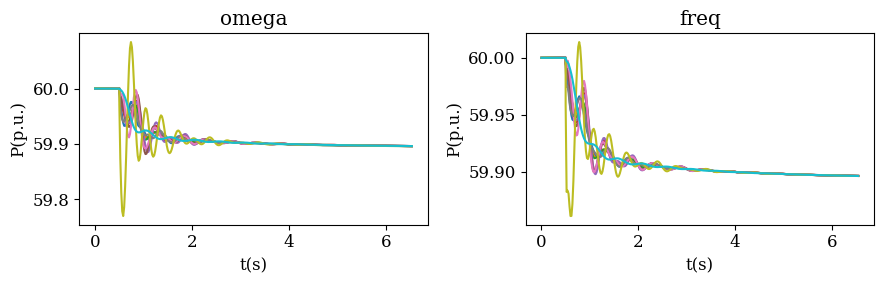

In [40]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 15
TimeStep = np.size(ListTime)-200
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()

## compare power command and output power

In [41]:
ListTime = ss.dae.ts.t
ListPVDV = ss.dae.ts.y[:,ss.PVD1.v.a]
ListPVDI = ss.dae.ts.x[:,ss.PVD1.Ipout_y.a]
ListPVDPower = ListPVDV*ListPVDI
ListPVDPowerCMD = ss.dae.ts.y[:,ss.PVD1.Psum.a]

In [42]:
np.size(ListTime )

535

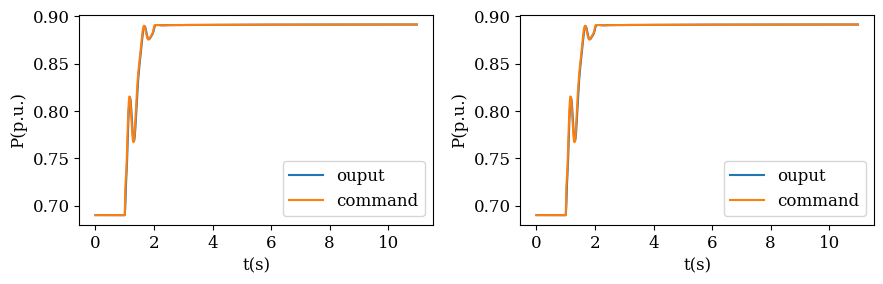

In [43]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPower[TimeStep_start:TimeStep, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPower[TimeStep_start:TimeStep, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

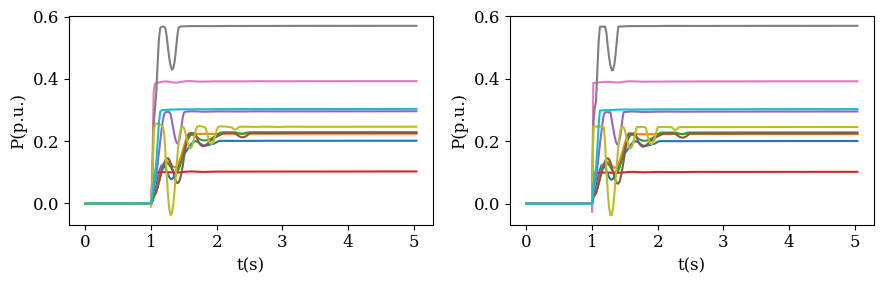

In [44]:
plt_idx = np.arange(0, 10)
TimeStep_start = 0
TimeStep = np.size(ListTime)-300
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListPVDPower[TimeStep_start:TimeStep, plt_idx]-ListPVDPower[0, plt_idx], label='ouput')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()

plt.subplot(1,2,2)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx]-ListPVDPower[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()
fig.tight_layout()

## Compare omega

In [45]:
ss.BusFreq.f

Algeb: BusFreq.f, a=[481 482 483 484 485 486 487 488 489 490 491], v=[0.99824888 0.99824886 0.99824888 0.99824903 0.99824899 0.99824916
 0.99824926 0.99824893 0.99824908 0.99824886 0.99824881], e=[0.00000000e+00 0.00000000e+00 1.11022302e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]

In [46]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz


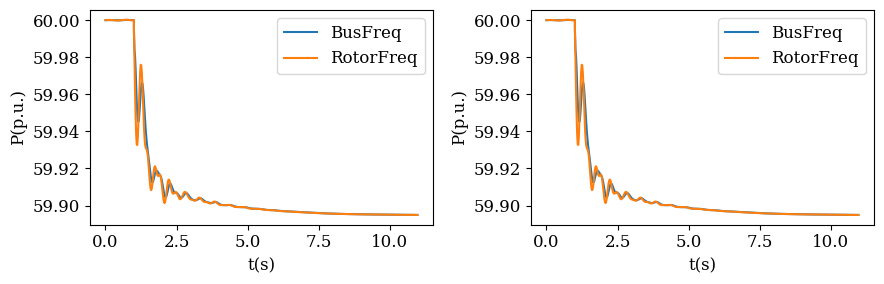

In [47]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
TimeStep_start = 0
TimeStep = np.size(ListTime)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

# With NN

In [52]:
import pickle

# load the data
f = open('/content/Weights_RNN.pckl', 'rb')
# f = open('Weights_RNN.pckl', 'rb')

[w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN]= pickle.load(f)
f.close()

In [53]:
ones_frequency=tf.ones((10,20),dtype=tf.float32)

def Action_RNN(w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN, pref0_init, idexs, max_action):
    state =   tf.reshape(tf.constant((ss.PVD1.fHz.v-60),dtype=tf.float32), (1,-1))
    nonlinear_plus=K.sum(K.relu(K.dot(tf.linalg.diag(state),ones_frequency)+b_plus_RNN)\
                    *w_plus_RNN,axis=2)
    nonlinear_minus=K.sum(K.relu(-K.dot(tf.linalg.diag(state),ones_frequency)+b_minus_RNN)\
                    *w_minus_RNN,axis=2)
    action_nonconstrain=tf.reshape( nonlinear_plus+nonlinear_minus, -1).numpy()
    action = max_action[idexs]-tf.nn.relu(max_action[idexs]-action_nonconstrain[idexs])+tf.nn.relu(-max_action[idexs]-action_nonconstrain[idexs])
    return action

## init

In [56]:
!andes misc -C

No output file found in the working directory.


In [57]:
ss = andes.load(get_case('/content/ieee39_test.xlsx'),
                setup=False,
                no_output=False)

INFO:andes:Working directory: "/content/andes_wq"
DEBUG:andes:Found files: ['/content/ieee39_test.xlsx']
INFO:andes.system:> Reloaded generated Python code of module "pycode".
DEBUG:andes.io:Input format guessed as xlsx.
INFO:andes.io:Parsing input file "/content/ieee39_test.xlsx"...
INFO:andes.io:Input file parsed in 5.2783 seconds.


In [58]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
ss.BusFreq.Tf.v[0:10] = 0.05*np.ones(10)
ss.BusFreq.Tw.v[0:10] = 0.03*np.ones(10)


In [60]:
fault_time = 1

ss.setup()

INFO:andes.core.service:ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
DEBUG:andes.system:Setting internal address for Bus
DEBUG:andes.system:Setting internal address for PQ
DEBUG:andes.system:Setting internal address for PV
DEBUG:andes.system:Setting internal address for Slack
DEBUG:andes.system:Setting internal address for Shunt
DEBUG:andes.system:Setting internal address for Line
DEBUG:andes.system:Setting internal address for Area
INFO:andes.system:System internal structure set up in 0.3646 seconds.


True

In [61]:
# use constant power model for PQ
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.PFlow.run()

DEBUG:andes.system:Entering connectivity check.
INFO:andes.system:-> System connectivity check results:
INFO:andes.system:  No islanded bus detected.
INFO:andes.system:  System is interconnected.
DEBUG:andes.system:  Bus indices in interconnected system (0-based): [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]
INFO:andes.system:  Each island has a slack bus correctly defined and enabled.
INFO:andes.routines.pflow:
-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
INFO:andes.routines.pflow:Power flow initialized in 0.0293 seconds.
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 23.4503543 on v Bus 10
INFO:andes.routines.pflow:0: |F(x)| = 23.4503543
DEBUG:andes.system:Jacobian updated at t=0.000000.
DEBUG:andes.routines.pflow:Max. algeb mismatch 0.6960934735 on v Bus 11
INFO:andes.routines.pflow:1: |F(x)| = 0.696

True

In [62]:
ratiogen =0.7
num_PVD = 10
ss.PVD1.gammap.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.PVD1.gammaq.v[0:num_PVD] = np.ones(num_PVD )*(1-ratiogen)
ss.GENROU.gammap.v[0:num_PVD] = np.ones(num_PVD )*ratiogen
ss.GENROU.gammaq.v[0:num_PVD] = np.ones(num_PVD )*ratiogen

In [63]:
ss.PVD1.Ipcmd.lim.allow_adjust = True
ss.PVD1.Iqcmd.lim.allow_adjust = True
ss.PVD1.ialim.v[0:10] = ss.PVD1.ialim.v[0:10]*300


In [64]:
ss.TDS.config.tf = fault_time
ss.TDS.run()

INFO:andes.routines.tds:
-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-1 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
DEBUG:andes.system:Setting internal address for Toggler
DEBUG:andes.system:Bus internal address exists
DEBUG:andes.system:PQ internal address exists
DEBUG:andes.system:PV internal address exists
DEBUG:andes.system:Slack internal address exists
DEBUG:andes.system:Shunt internal address exists
DEBUG:andes.system:Line internal address exists
DEBUG:andes.system:Area internal address exists
DEBUG:andes.system:Setting internal address for ACEc
DEBUG:andes.system:Setting internal address for GENROU
DEBUG:andes.system:Setting internal address for TGOV1
DEBUG:andes.system:Setting internal address for EXST1
DEBUG:andes.system:Setting internal address for ESST3A
DEBUG:andes.system:Setting internal address for IEEEST
DEBUG:andes.system:Setting internal address for ST2CUT
DEBUG:andes.system:Setting internal address for BusFreq
DEBUG:andes.sys

  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.
DEBUG:andes.system:Jacobian updated at t=0.000000: t=0.


 28%|############                               | 28/100 [00:01<00:03, 23.77%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 32%|#############7                             | 32/100 [00:01<00:02, 25.04%/s]

INFO:andes.routines.tds:Simulation completed in 1.2812 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0285 seconds.


True

<>:3: DeprecationWarning: invalid escape sequence '\o'
/content/andes_wq/andes/shared.py:89: DeprecationWarning: Use shutil.which instead of find_executable
  if find_executable('dvipng'):
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2860: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vmin, vmax = map(float, [vmin, vmax])


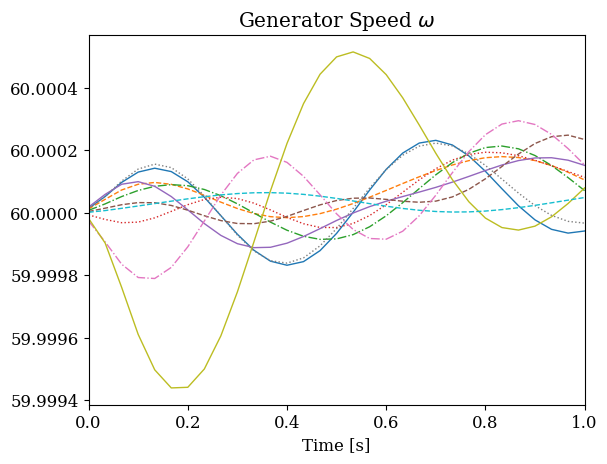

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Generator Speed $\\omega$'}, xlabel='Time [s]'>)

In [65]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')

In [66]:
ss.PVD1.pref0.v

array([0.69004982, 1.64182835, 1.87442435, 1.86527398, 1.42046891,
       2.01961911, 1.81212975, 1.79689992, 2.56877321, 0.04043839])

## Apply the control

In [67]:

PQInit = np.array(ss.PQ.Ppf.v[PQStepIdx]).copy()
ss.PQ.Ppf.v[PQStepIdx] = PQ_after


pref0_init = ss.PVD1.pref0.v.copy()

In [68]:
PQ_after

6

In [69]:
step_t = 0.02
tstart =fault_time
TimeLength = tstart+10
idexs = np.arange(0,10)
for t in np.arange(tstart, TimeLength, step_t):
    ss.PVD1.pref0.v[idexs] = pref0_init[idexs]\
        -Action_RNN(w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN, pref0_init, idexs, max_action)
    ss.TDS.config.tf = t
    ss.TDS.run(tstep = 0.01)

DEBUG:andes.routines.tds:Resuming simulation from t=1.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0000s.


100%|####################################| 100.0/100 [00:00<00:00, 386571.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0030 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0537 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=1.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.


 99%|#######################################6| 99.0/100 [00:00<00:00, 278.06%/s]

DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 196.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.5105 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0788 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.020000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 640.99%/s]

DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 351.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.2865 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0450 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.040000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 467.22%/s]

DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 267.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.3902 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0701 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.060000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 860.92%/s]

DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 326.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.3119 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0552 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.080000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 594.28%/s]

DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 326.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.3129 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0861 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=1.100000: within 0.1s of event.


 99%|#######################################6| 99.0/100 [00:00<00:00, 943.62%/s]

DEBUG:andes.system:Jacobian updated at t=1.120000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 390.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.2617 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0580 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 383.90%/s]

INFO:andes.routines.tds:Simulation completed in 0.2678 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0589 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 490.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.2062 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0439 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|#######################################| 100.0/100 [00:00<00:00, 437.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.2307 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0415 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|#######################################| 100.0/100 [00:00<00:00, 984.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1039 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0705 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 392.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.2591 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0772 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 648.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.1574 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0597 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1515.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0810 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0832 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 472.36%/s]

INFO:andes.routines.tds:Simulation completed in 0.2154 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0812 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|#######################################| 100.0/100 [00:00<00:00, 840.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.1260 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0761 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 823.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.1273 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0465 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.3200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.320000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 554.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1946 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0455 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 376.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.2731 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0649 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.3600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.360000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 390.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.2594 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0649 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.3800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 650.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.1564 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0617 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.420000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 490.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.2063 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0478 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 524.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.1931 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0872 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 755.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.1348 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0852 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 597.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1709 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0750 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.4800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 746.55%/s]

INFO:andes.routines.tds:Simulation completed in 0.1367 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0617 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1021.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1049 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0637 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.5200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 802.11%/s]

INFO:andes.routines.tds:Simulation completed in 0.1273 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0581 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.540000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 835.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.1237 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0473 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.5600s.


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.560000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 771.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1364 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0393 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=1.5800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1076.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1006 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0685 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1381.76%/s]


INFO:andes.routines.tds:Simulation completed in 0.0760 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0302 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1041.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0988 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0696 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1505.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.0706 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0409 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1005.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.1093 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0407 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.6800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1372.18%/s]

INFO:andes.routines.tds:Simulation completed in 0.0799 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0390 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|#######################################| 100.0/100 [00:00<00:00, 515.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.1965 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0641 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|#######################################| 100.0/100 [00:00<00:00, 628.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.1682 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0768 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1712.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0607 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0473 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.780000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1154.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0921 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0398 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.7800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1076.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0982 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0719 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=1.820000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1006.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.1080 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0424 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2627.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0429 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0405 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1605.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0654 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0354 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2110.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.0500 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0365 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.8800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3100.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0336 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0311 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9000s.


DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2560.63%/s]


INFO:andes.routines.tds:Simulation completed in 0.0451 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0286 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3046.24%/s]


INFO:andes.routines.tds:Simulation completed in 0.0354 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0287 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2715.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.0381 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0283 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2742.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0377 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0312 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=1.9800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2399.91%/s]

INFO:andes.routines.tds:Simulation completed in 0.0428 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0293 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2141.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0479 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0330 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1570.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0662 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0475 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1592.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0670 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0343 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1690.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0603 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0345 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1829.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0562 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0366 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.100000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1883.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0592 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0346 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2963.84%/s]

INFO:andes.routines.tds:Simulation completed in 0.0378 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0335 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2622.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.0407 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0324 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2427.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0440 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0385 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1309.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0779 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0398 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1396.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0731 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0380 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2155.70%/s]


INFO:andes.routines.tds:Simulation completed in 0.0496 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0339 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2112.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0501 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0345 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2695.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0385 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0331 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2415.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0431 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0343 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2596.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0414 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0361 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.3200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2108.70%/s]

INFO:andes.routines.tds:Simulation completed in 0.0486 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0353 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1582.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0658 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0419 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1501.06%/s]

INFO:andes.routines.tds:Simulation completed in 0.0680 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0503 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.3800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1268.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.0810 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0530 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2704.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0402 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0419 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2511.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.0430 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0369 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3731.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0281 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0421 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3080.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0353 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0370 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.4800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2540.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0408 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0422 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.5000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.500000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1458.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0731 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0458 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2197.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0492 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0534 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.5400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1667.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0616 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0462 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1832.10%/s]

INFO:andes.routines.tds:Simulation completed in 0.0577 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0452 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.5800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1515.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0674 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0394 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.6000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2617.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0395 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0427 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2877.42%/s]

INFO:andes.routines.tds:Simulation completed in 0.0361 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0402 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.6400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1959.70%/s]

INFO:andes.routines.tds:Simulation completed in 0.0545 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0502 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2013.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0546 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0529 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.6800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1593.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0645 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0494 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1497.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.0683 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0424 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=2.7200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2218.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0464 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0444 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2332.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0442 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0511 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2534.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0424 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0482 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.7800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=2.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1717.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.0619 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0498 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1831.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0577 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0517 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1818.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0580 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0580 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1788.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.0587 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0545 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1915.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0538 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0445 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.8800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2986.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.0349 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0507 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3103.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0347 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0506 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3002.02%/s]

INFO:andes.routines.tds:Simulation completed in 0.0371 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0492 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2315.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.0463 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0572 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2600.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.0417 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0630 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=2.9800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2278.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0454 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0593 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2493.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0438 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0582 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2089.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0504 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0518 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.060000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 2164.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0486 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0554 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2652.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0390 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0544 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.0800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2455.11%/s]

INFO:andes.routines.tds:Simulation completed in 0.0421 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0530 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1862.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.0572 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0629 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1935.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0551 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0567 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2325.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0457 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0549 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.160000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1370.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0756 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0693 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.1800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2202.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0473 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0571 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1896.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0543 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0534 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2200s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1884.38%/s]


INFO:andes.routines.tds:Simulation completed in 0.0578 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0612 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2400s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1534.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0668 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0611 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2600s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1495.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0700 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0601 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.2800s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2102.87%/s]

INFO:andes.routines.tds:Simulation completed in 0.0508 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.0501 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3000s.
DEBUG:andes.routines.tds:Increased deltatmax to tstep.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2183.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0486 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0637 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2506.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0426 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0594 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1775.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0594 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0800 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1361.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0800 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0972 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 827.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.1233 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0749 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2113.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0515 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0726 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2450.50%/s]


INFO:andes.routines.tds:Simulation completed in 0.0428 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0718 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2316.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0454 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0686 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2506.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0422 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0708 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1925.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0541 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0783 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1762.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0591 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1057 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2377.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0456 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0719 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2746.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0385 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0800 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2366.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0449 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1044 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.600000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1646.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0630 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0734 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 852.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1201 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0957 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1275.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0809 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0803 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2019.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0521 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0863 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1675.82%/s]

INFO:andes.routines.tds:Simulation completed in 0.0622 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1304.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0783 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0881 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1295.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0788 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1028 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1250.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0827 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0733 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1851.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0562 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0762 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2078.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.0503 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0900 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1836.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.0565 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0808 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1459.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0710 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0849 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1261.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.0828 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0835 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1036.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0987 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0796 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8600s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1067.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0966 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.8800s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.900000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 955.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.1074 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0786 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=3.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=3.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=3.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 993.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.1032 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0970 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1469.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0709 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0962 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=3.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2205.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0506 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0988 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1894.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0556 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0846 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=3.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2183.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0507 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0971 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2242.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0464 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0931 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1675.18%/s]

INFO:andes.routines.tds:Simulation completed in 0.0612 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0911 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2121.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0486 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0888 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1923.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0588 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0849 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.100000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1567.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0660 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0929 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.120000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1121.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0914 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 965.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1080 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1307 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 748.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.1360 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0911 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1565.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0685 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1082 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1366.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0746 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1459.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0711 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1030 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1482.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0703 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0742 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1588.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0655 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0718 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1687.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0606 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0742 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2091.96%/s]

INFO:andes.routines.tds:Simulation completed in 0.0491 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0780 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1912.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0567 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0744 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1811.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0585 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0831 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1464.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0702 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0803 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1660.16%/s]

INFO:andes.routines.tds:Simulation completed in 0.0615 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0762 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1596.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0654 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0737 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1435.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.0744 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0801 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.440000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1407.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0750 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0876 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 988.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.1042 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0915 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 958.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.1065 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0966 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2849.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0379 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0809 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2569.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0420 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0853 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2890.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0378 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0816 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2780.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0373 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0817 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2460.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0435 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0869 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2203.11%/s]

INFO:andes.routines.tds:Simulation completed in 0.0481 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0830 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2466.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0430 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0822 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.640000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1202.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0854 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0781 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1426.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0729 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1538.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0676 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0904 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1408.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0725 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0860 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2233.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0461 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0807 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1596.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0657 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0805 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2059.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0514 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0815 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2190.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0470 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0802 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1845.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0558 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0976 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1456.96%/s]

INFO:andes.routines.tds:Simulation completed in 0.0713 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0779 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1616.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0632 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0850 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1338.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0769 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0943 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1258.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0816 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0832 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1202.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0856 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0944 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.920000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1093.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0939 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0918 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=4.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.940000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1349.63%/s]


INFO:andes.routines.tds:Simulation completed in 0.0778 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0879 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=4.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=4.960000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1060.42%/s]

INFO:andes.routines.tds:Simulation completed in 0.0963 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0821 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=4.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2689.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0395 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0856 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=4.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2592.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.0398 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0872 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2360.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0452 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1065 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2001.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.0527 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2751.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.0401 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0918 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2620.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.0406 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1077 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2630.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0405 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0898 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2697.91%/s]


INFO:andes.routines.tds:Simulation completed in 0.0394 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1143 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2577.10%/s]

INFO:andes.routines.tds:Simulation completed in 0.0415 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1098 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1873.57%/s]


INFO:andes.routines.tds:Simulation completed in 0.0566 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0915 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1255.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0821 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0865 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.1800s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.200000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1108.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0930 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0909 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=5.220000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1208.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.0850 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0965 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1555.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0673 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0897 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2169.10%/s]

INFO:andes.routines.tds:Simulation completed in 0.0486 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0933 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2030.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.0508 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0906 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1868.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0566 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0970 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1818.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0577 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.0923 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1481.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.0703 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1154 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1421.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0729 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1074 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1246.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0855 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1163 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 997.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.1059 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1309 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=5.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1176.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.0880 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1442 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1736.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.0599 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1123 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4400s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2345.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1175 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2786.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0382 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1095 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2904.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0368 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1381 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2624.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0404 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1716 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1694.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0613 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1395 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2091.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0544 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.1356 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2471.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0449 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1209 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2134.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.0533 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1530 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2053.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.0501 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1271 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6200s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1996.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0517 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1193 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1893.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0555 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1179 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6600s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2258.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0465 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1182 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2892.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0370 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1308 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2154.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0489 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1184 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2737.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0389 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1159 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1722.10%/s]

INFO:andes.routines.tds:Simulation completed in 0.0606 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1348 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1764.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0590 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1195 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.7800s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1726.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0606 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1268 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1348.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0765 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1207 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1720.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.0603 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1174 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2780.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.0385 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1363 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2818.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.0378 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1414 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=5.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1843.96%/s]

INFO:andes.routines.tds:Simulation completed in 0.0588 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1473 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2111.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0499 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1494 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2633.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0404 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1303 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2899.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0368 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1477 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1868.90%/s]

INFO:andes.routines.tds:Simulation completed in 0.0580 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1533 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=5.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1684.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0634 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1558 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1608.91%/s]

INFO:andes.routines.tds:Simulation completed in 0.0638 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1558 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2633.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.0410 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1389 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=6.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2708.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0392 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1245 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2195.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0492 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1357 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=6.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2630.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0404 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1227 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 1985.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0507 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1412 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2629.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0404 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1258 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2658.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0399 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1289 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2641.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.0405 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1267 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2813.06%/s]

INFO:andes.routines.tds:Simulation completed in 0.0382 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1256 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2763.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0385 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1374 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.240000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1103.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0931 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1507 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.260000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 991.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.1035 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1522 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.280000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 995.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.1031 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1710 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.300000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 858.11%/s]

INFO:andes.routines.tds:Simulation completed in 0.1183 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1639 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1702.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0615 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1139 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=6.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1393.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0733 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1234 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.360000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1417.18%/s]

INFO:andes.routines.tds:Simulation completed in 0.0738 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1083 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3600s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1132.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.0905 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1116 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1005.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.1018 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1116 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1007.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.1019 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1288 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.440000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1011.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.1011 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1170 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.460000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1222.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.0851 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1084 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2327.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0474 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1275 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2529.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0421 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1266 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2280.86%/s]

INFO:andes.routines.tds:Simulation completed in 0.0472 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1186 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



100%|######################################| 100.0/100 [00:00<00:00, 2806.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.0380 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1198 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2677.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0398 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1182 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2364.72%/s]

INFO:andes.routines.tds:Simulation completed in 0.0450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1128 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2264.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0464 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1306 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2040.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0552 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1224 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6200s.


DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.640000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1675.41%/s]

INFO:andes.routines.tds:Simulation completed in 0.0619 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1147 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.



  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1159.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0885 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1215 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.680000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1266.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0813 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1251 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.700000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 881.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.1167 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1372 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.720000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1154.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.0889 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1151 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.740000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1158.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0886 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1209 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.760000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1171.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0894 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1231 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.780000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 885.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.1158 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1408 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1250.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.0823 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1191 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.820000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1205.82%/s]

INFO:andes.routines.tds:Simulation completed in 0.0851 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1222 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1196.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0865 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1176 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.860000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 903.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.1153 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1569 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.880000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1070.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.0958 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1260 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1179.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0871 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1235 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.920000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1210.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0847 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1224 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 918.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1106 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1446 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.960000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1192.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.0860 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1197 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=6.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1168.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.0879 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1231 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=6.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=6.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.000000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1162.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0894 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1242 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.020000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1027.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.1001 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1648 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.040000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1144.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.0907 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1275 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.060000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1158.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0891 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1262 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.080000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1193.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0860 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1334 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 942.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.1098 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1452 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.120000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1162.70%/s]

INFO:andes.routines.tds:Simulation completed in 0.0890 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1297 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 922.35%/s]

INFO:andes.routines.tds:Simulation completed in 0.1124 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1495 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.160000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 912.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1123 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1770 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.180000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 810.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1256 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1770 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.200000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 940.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.1082 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1573 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.220000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 819.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1234 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1870 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.240000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 908.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.1115 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1744 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.260000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1051.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0974 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1486 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.280000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1167.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.0878 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1606 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.300000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 790.82%/s]

INFO:andes.routines.tds:Simulation completed in 0.1315 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1718 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.320000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 784.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.1290 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1812 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.340000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 924.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.1105 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1716 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.360000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 781.22%/s]

INFO:andes.routines.tds:Simulation completed in 0.1322 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1836 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.380000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 992.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.1030 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1796 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 994.40%/s]

INFO:andes.routines.tds:Simulation completed in 0.1028 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1766 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.420000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 795.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1311 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1734 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.440000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1200.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0857 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1695 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 855.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1182 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1780 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 796.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1272 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2133 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.500000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 884.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1155 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1747 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.520000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 893.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.1147 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1731 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.540000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 843.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.1202 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1754 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.560000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1007.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.1015 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1906 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1051.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0974 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1703 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.600000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 686.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.1485 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1694 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 870.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.1172 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2044 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.640000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 810.65%/s]

INFO:andes.routines.tds:Simulation completed in 0.1247 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2040 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.660000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 865.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1193 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1638 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.680000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1092.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0938 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1340 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.700000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1081.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.0943 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1450 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.720000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 895.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1150 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1667 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.740000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1093.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0939 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1361 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.760000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1047.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0978 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1387 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.780000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1179.02%/s]

INFO:andes.routines.tds:Simulation completed in 0.0885 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1482 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2215.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0466 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1677 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3296.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.0326 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1427 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=7.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=7.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=7.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1120.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.0906 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1403 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2275.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0465 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1381 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=7.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2090.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.0506 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1891 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2884.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.0372 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1390 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=7.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2421.32%/s]

INFO:andes.routines.tds:Simulation completed in 0.0436 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.1433 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2435.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0431 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.1438 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2544.07%/s]

INFO:andes.routines.tds:Simulation completed in 0.0419 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1722 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2124.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0495 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1474 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=7.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2686.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0396 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1415 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=8.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2431.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0440 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.1468 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2846.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.0374 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1629 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2311.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.0473 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1599 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2719.99%/s]

INFO:andes.routines.tds:Simulation completed in 0.0391 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1455 seconds.


DEBUG:andes.routines.tds:Resuming simulation from t=8.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2720.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0386 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".


INFO:andes.routines.tds:Outputs written in 0.1470 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2359.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.0450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1531 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2038.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.0538 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1675 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.160000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1003.06%/s]

INFO:andes.routines.tds:Simulation completed in 0.1028 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1505 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.180000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1102.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0940 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1514 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1712.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0613 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1528 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1186.89%/s]

INFO:andes.routines.tds:Simulation completed in 0.0868 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1621 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1389.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0735 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1504 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.260000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1131.88%/s]

INFO:andes.routines.tds:Simulation completed in 0.0908 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1479 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.280000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1180.78%/s]

INFO:andes.routines.tds:Simulation completed in 0.0870 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1773 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.300000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1191.71%/s]

INFO:andes.routines.tds:Simulation completed in 0.0859 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1705 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.320000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1144.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0897 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1527 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.340000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1152.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0900 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1578 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.360000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1047.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.0979 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1686 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1155.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.0889 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1655 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.400000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 850.79%/s]

INFO:andes.routines.tds:Simulation completed in 0.1220 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1679 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.420000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 667.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.1523 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2275 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 903.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1153 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2279 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 795.21%/s]

INFO:andes.routines.tds:Simulation completed in 0.1314 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2203 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.480000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 828.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.1230 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1746 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.500000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 983.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1044 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2164 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.520000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1013.01%/s]

INFO:andes.routines.tds:Simulation completed in 0.1013 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1973 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.540000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 962.74%/s]

INFO:andes.routines.tds:Simulation completed in 0.1059 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1789 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.560000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1097.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0932 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2284 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.580000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 859.44%/s]

INFO:andes.routines.tds:Simulation completed in 0.1186 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2110 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.600000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 885.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.1152 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2313 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 810.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1266 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2015 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.620000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.640000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 757.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.1335 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2208 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.660000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 974.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1057 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1770 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 874.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.1160 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2435 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.700000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 762.54%/s]

INFO:andes.routines.tds:Simulation completed in 0.1326 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1881 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.720000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 891.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1133 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2190 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.740000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 889.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.1139 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2257 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.760000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 880.17%/s]

INFO:andes.routines.tds:Simulation completed in 0.1159 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2361 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.780000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 820.85%/s]

INFO:andes.routines.tds:Simulation completed in 0.1239 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2262 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.800000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 812.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.1248 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2185 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.820000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 894.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.1133 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2276 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.840000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 839.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.1214 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2101 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.860000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 975.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.1040 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2404 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 545.69%/s]


INFO:andes.routines.tds:Simulation completed in 0.1983 seconds.
INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.9119 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1061.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0966 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2183 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 852.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.1204 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1925 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 908.95%/s]

INFO:andes.routines.tds:Simulation completed in 0.1127 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2028 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 972.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.1050 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1889 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=8.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1023.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.1002 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.1885 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=8.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=8.980000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.000000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1167.08%/s]

INFO:andes.routines.tds:Simulation completed in 0.0880 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2101 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.000000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.020000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 892.70%/s]

INFO:andes.routines.tds:Simulation completed in 0.1177 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2318 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.020000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.040000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 973.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1053 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2244 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.040000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.060000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 848.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.1200 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2358 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.060000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.080000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 924.20%/s]

INFO:andes.routines.tds:Simulation completed in 0.1108 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2369 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.080000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.100000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 870.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.1173 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2414 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.100000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.120000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1109.52%/s]

INFO:andes.routines.tds:Simulation completed in 0.0925 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2012 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.120000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.140000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 841.58%/s]

INFO:andes.routines.tds:Simulation completed in 0.1214 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2265 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.140000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.160000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1001.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.1019 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2158 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.160000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.180000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 867.98%/s]

INFO:andes.routines.tds:Simulation completed in 0.1178 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2028 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.180000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.200000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 734.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1374 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2509 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.200000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.220000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 855.04%/s]

INFO:andes.routines.tds:Simulation completed in 0.1194 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2426 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.220000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.240000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 913.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.1119 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2499 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.240000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.260000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 781.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.1305 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2248 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.260000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.280000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 960.97%/s]

INFO:andes.routines.tds:Simulation completed in 0.1065 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2149 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.280000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.300000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1042.64%/s]

INFO:andes.routines.tds:Simulation completed in 0.1015 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2310 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.300000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.320000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 872.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.1173 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2086 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.320000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.340000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1038.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.0985 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2277 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.340000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.360000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 768.84%/s]

INFO:andes.routines.tds:Simulation completed in 0.1323 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2366 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.360000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.380000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1025.63%/s]

INFO:andes.routines.tds:Simulation completed in 0.0998 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2291 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.380000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.400000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1132.15%/s]

INFO:andes.routines.tds:Simulation completed in 0.0906 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2459 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.400000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.420000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1016.10%/s]

INFO:andes.routines.tds:Simulation completed in 0.1006 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2285 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.420000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.440000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 844.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.1208 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2285 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.440000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.460000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 719.27%/s]

INFO:andes.routines.tds:Simulation completed in 0.1430 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2439 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.460000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.480000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1096.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0953 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2212 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.480000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.500000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 992.61%/s]

INFO:andes.routines.tds:Simulation completed in 0.1044 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2279 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.500000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.520000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 996.31%/s]

INFO:andes.routines.tds:Simulation completed in 0.1040 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2031 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.520000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.540000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1089.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0961 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2117 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.540000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.560000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1109.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0922 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2457 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.560000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.580000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1150.12%/s]

INFO:andes.routines.tds:Simulation completed in 0.0912 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2080 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.580000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.600000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1056.30%/s]

INFO:andes.routines.tds:Simulation completed in 0.0972 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2557 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.600000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=9.620000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 736.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1382 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2802 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=9.620000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1474.46%/s]

INFO:andes.routines.tds:Simulation completed in 0.0716 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2443 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3293.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0327 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2302 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1859.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.0587 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2661 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2194.37%/s]

INFO:andes.routines.tds:Simulation completed in 0.0470 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2210 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2462.18%/s]

INFO:andes.routines.tds:Simulation completed in 0.0440 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2066 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2441.42%/s]

INFO:andes.routines.tds:Simulation completed in 0.0423 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2396 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2247.76%/s]

INFO:andes.routines.tds:Simulation completed in 0.0459 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2333 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2040.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0505 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2254 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2278.00%/s]

INFO:andes.routines.tds:Simulation completed in 0.0455 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2688 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2634.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0403 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2140 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3253.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0329 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2064 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2737.49%/s]

INFO:andes.routines.tds:Simulation completed in 0.0393 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2830 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2543.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0427 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2582 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2286.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0464 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2522 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2334.38%/s]

INFO:andes.routines.tds:Simulation completed in 0.0485 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2289 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2948.34%/s]

INFO:andes.routines.tds:Simulation completed in 0.0366 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2218 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2791.48%/s]

INFO:andes.routines.tds:Simulation completed in 0.0381 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2245 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2535.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.0450 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2192 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=9.9800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.


100%|#######################################| 100.0/100 [00:00<00:00, 921.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.1106 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2151 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.000100: within 0.1s of event.
DEBUG:andes.system:Entering connectivity check.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1000.45%/s]

INFO:andes.routines.tds:Simulation completed in 0.1024 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2551 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.020000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1550.87%/s]

INFO:andes.routines.tds:Simulation completed in 0.0668 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2223 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.040000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1248.92%/s]

INFO:andes.routines.tds:Simulation completed in 0.0823 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2153 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.060000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1530.57%/s]

INFO:andes.routines.tds:Simulation completed in 0.0678 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2482 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.0800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.080000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1225.91%/s]

INFO:andes.routines.tds:Simulation completed in 0.0839 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2308 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.
DEBUG:andes.system:Jacobian updated at t=10.100000: within 0.1s of event.


100%|######################################| 100.0/100 [00:00<00:00, 1596.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0649 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2414 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2669.93%/s]

INFO:andes.routines.tds:Simulation completed in 0.0419 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2516 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3001.94%/s]

INFO:andes.routines.tds:Simulation completed in 0.0358 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2913 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2316.82%/s]

INFO:andes.routines.tds:Simulation completed in 0.0453 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2449 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.1800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2150.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0565 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2528 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2131.26%/s]

INFO:andes.routines.tds:Simulation completed in 0.0485 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2886 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2766.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0410 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2535 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2325.25%/s]

INFO:andes.routines.tds:Simulation completed in 0.0456 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2899 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 1921.75%/s]

INFO:andes.routines.tds:Simulation completed in 0.0536 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2293 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.2800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2469.47%/s]

INFO:andes.routines.tds:Simulation completed in 0.0430 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2235 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2077.83%/s]

INFO:andes.routines.tds:Simulation completed in 0.0530 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2137 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2188.03%/s]

INFO:andes.routines.tds:Simulation completed in 0.0506 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2666 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3023.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0366 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2213 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2948.05%/s]

INFO:andes.routines.tds:Simulation completed in 0.0365 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2208 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.3800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3240.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0346 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2552 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3488.51%/s]

INFO:andes.routines.tds:Simulation completed in 0.0311 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2208 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3493.80%/s]

INFO:andes.routines.tds:Simulation completed in 0.0310 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2239 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3692.53%/s]

INFO:andes.routines.tds:Simulation completed in 0.0295 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2312 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3596.77%/s]

INFO:andes.routines.tds:Simulation completed in 0.0307 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2359 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.4800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3901.24%/s]

INFO:andes.routines.tds:Simulation completed in 0.0280 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2235 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2855.68%/s]

INFO:andes.routines.tds:Simulation completed in 0.0376 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2237 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2999.62%/s]

INFO:andes.routines.tds:Simulation completed in 0.0377 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2519 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3809.23%/s]

INFO:andes.routines.tds:Simulation completed in 0.0276 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2361 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 4002.69%/s]

INFO:andes.routines.tds:Simulation completed in 0.0273 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2267 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.5800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 3165.13%/s]

INFO:andes.routines.tds:Simulation completed in 0.0345 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2421 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


100%|######################################| 100.0/100 [00:00<00:00, 2782.14%/s]

INFO:andes.routines.tds:Simulation completed in 0.0384 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2374 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.640000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1529.82%/s]

INFO:andes.routines.tds:Simulation completed in 0.0680 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2327 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.640000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.660000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1008.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1022 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2470 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.660000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.680000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 949.28%/s]

INFO:andes.routines.tds:Simulation completed in 0.1090 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2508 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.6800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.680000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.700000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1013.67%/s]

INFO:andes.routines.tds:Simulation completed in 0.1013 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2421 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.700000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.720000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1015.73%/s]

INFO:andes.routines.tds:Simulation completed in 0.1009 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2340 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.720000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.740000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 940.56%/s]

INFO:andes.routines.tds:Simulation completed in 0.1097 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2336 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.740000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.760000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1184.66%/s]

INFO:andes.routines.tds:Simulation completed in 0.0867 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2397 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.760000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.780000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1088.18%/s]

INFO:andes.routines.tds:Simulation completed in 0.0953 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2406 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.7800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.780000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.800000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1080.60%/s]

INFO:andes.routines.tds:Simulation completed in 0.0947 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2424 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.800000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.820000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 990.33%/s]

INFO:andes.routines.tds:Simulation completed in 0.1024 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2476 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.820000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.840000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1096.09%/s]

INFO:andes.routines.tds:Simulation completed in 0.0936 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2433 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.840000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.860000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1129.29%/s]

INFO:andes.routines.tds:Simulation completed in 0.0908 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2561 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.860000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.880000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 756.50%/s]

INFO:andes.routines.tds:Simulation completed in 0.1346 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2750 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.8800s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.880000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.900000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1090.19%/s]

INFO:andes.routines.tds:Simulation completed in 0.0941 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2951 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9000s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.900000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.920000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 895.59%/s]

INFO:andes.routines.tds:Simulation completed in 0.1157 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2399 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9200s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.920000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.940000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 905.81%/s]

INFO:andes.routines.tds:Simulation completed in 0.1183 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2303 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9400s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.940000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.960000: update every 6 iterations.


100%|#######################################| 100.0/100 [00:00<00:00, 898.43%/s]

INFO:andes.routines.tds:Simulation completed in 0.1170 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.3049 seconds.
DEBUG:andes.routines.tds:Resuming simulation from t=10.9600s.
DEBUG:andes.routines.tds:Initial step size for resumed simulation is h=0.0200s.


  0%|                                                    | 0/100 [00:00<?, ?%/s]

DEBUG:andes.system:Jacobian updated at t=10.960000: update every 6 iterations.
DEBUG:andes.system:Jacobian updated at t=10.980000: update every 6 iterations.


100%|######################################| 100.0/100 [00:00<00:00, 1008.39%/s]

INFO:andes.routines.tds:Simulation completed in 0.1016 seconds.


INFO:andes.routines.tds:Outputs to "ieee39_test_out.lst" and "ieee39_test_out.npz".
INFO:andes.routines.tds:Outputs written in 0.2313 seconds.


In [70]:
if RecoverFlag:
    tstart =fault_time+10
    TimeLength = tstart+10
    ss.PQ.Ppf.v[PQStepIdx] = PQInit

    for t in np.arange(tstart, TimeLength, step_t):
        ss.PVD1.pref0.v[idexs] = pref0_init[idexs]\
            -Action_RNN(w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN, pref0_init, idexs, max_action)
        ss.TDS.config.tf = t
        ss.TDS.run()

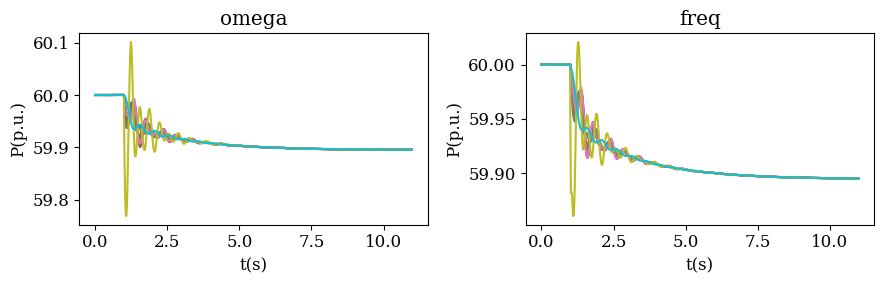

In [71]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()

## compare power command and output power

In [73]:
ListTime = ss.dae.ts.t
ListPVDV = ss.dae.ts.y[:,ss.PVD1.v.a]
ListPVDI = ss.dae.ts.x[:,ss.PVD1.Ipout_y.a]
ListPVDPower = ListPVDV*ListPVDI
ListPVDPowerCMD = ss.dae.ts.y[:,ss.PVD1.Psum.a]

In [74]:
np.size(ListTime )

535

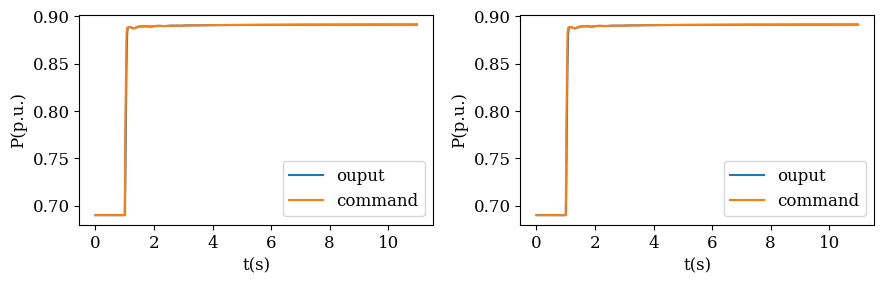

In [75]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPower[TimeStep_start:TimeStep, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPower[TimeStep_start:TimeStep, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

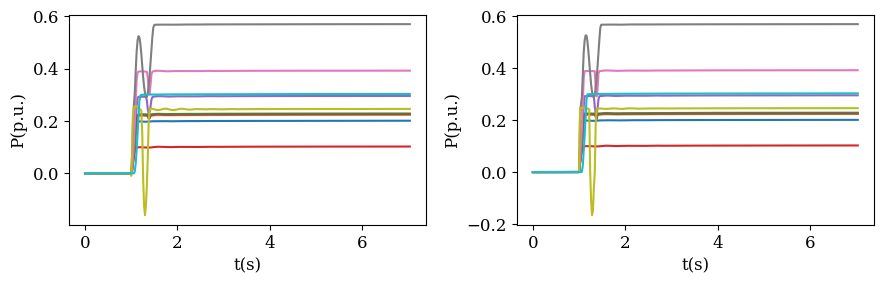

In [76]:
plt_idx = np.arange(0, 10)
TimeStep_start = 0
TimeStep = np.size(ListTime)-200
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListPVDPower[TimeStep_start:TimeStep, plt_idx]-ListPVDPower[0, plt_idx], label='ouput')
# plt.plot(ListTime[TimeStep_start:TimeStep], ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 0
# TimeStep = 300
# plt.plot(ListTime[TimeStep_start:TimeStep], ListPVDPower[TimeStep_start:TimeStep, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListPVDPowerCMD[TimeStep_start:TimeStep, plt_idx]-ListPVDPower[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()
fig.tight_layout()

## Compare omega

In [77]:
ss.BusFreq.f

Algeb: BusFreq.f, a=[481 482 483 484 485 486 487 488 489 490 491], v=[0.99825357 0.99825355 0.99825356 0.99825369 0.99825365 0.9982538
 0.99825387 0.9982536  0.99825377 0.99825355 0.99825347], e=[-2.22044605e-16  1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16]

In [78]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz


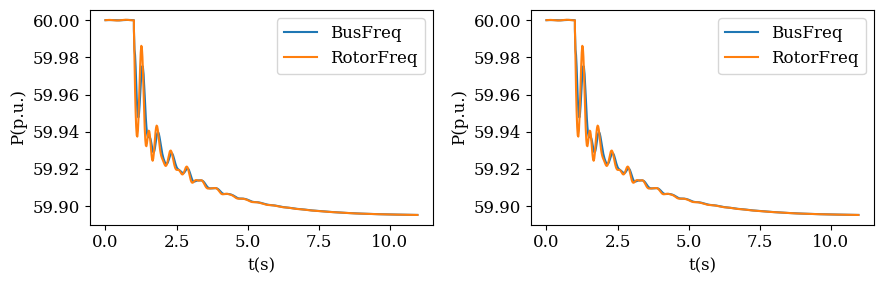

In [79]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
TimeStep_start = 0
TimeStep = np.size(ListTime)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()